In [3]:
import pandas as pd
import numpy as np

1\. Perform the following operations on plain `txt` files:

+ create a list of integrer numbers and then save it to a text file named "data_int.txt". Run the `cat` command to print the content of the file.
+ create a matrix of 5x5 floats and then save it to a text file named "data_float.txt". Use the `cat` command to print the content of the file.
+ load the txt file of the previous point and convert it to a csv file by hand.

In [6]:
filename= "data/data_int.txt"
l=[1,2,3,4]
with open(filename, 'a') as outfile:
    outfile.write(str(l))
!cat data/data_int.txt

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 [1, 2, 3, 4]

In [8]:
filename= "data/data_int.txt"
x = np.random.random((5,5))
print(x, ' ')
with open(filename, 'a') as outfile:
    outfile.write(str(x))
!cat data/data_float.txt

[[0.34597148 0.8087539  0.03680969 0.59579958 0.62734952]
 [0.1147222  0.15702469 0.81079921 0.22558699 0.87379369]
 [0.14541374 0.86573076 0.220898   0.34274957 0.88227785]
 [0.07571405 0.89861292 0.78944772 0.33377224 0.4406365 ]
 [0.64471234 0.7697838  0.22637083 0.80820393 0.97237011]]  
0.0,1.0,2.0,3.0,4.0 5.0,6.0,7.0,8.0,9.0 10.0,11.0,12.0,13.0,14.0 15.0,16.0,17.0,18.0,19.0 20.0,21.0,22.0,23.0,24.0 

In [10]:
import csv
with open('data/data_int.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",") for line in stripped if line)
    with open('data/data_int.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerows(lines)


with open('data/data_float.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",") for line in stripped if line)
    with open('data/data_float.csv', 'w') as out_file:
        writer = csv.writer(out_file)   
!cat data/data_int.csv
!cat data/data_float.csv

2\. Load the file *user_data.json*, which can be found at:

- https://www.dropbox.com/s/sz5klcdpckc39hd/user_data.json

and filter the data by the "CreditCardType" when it equals to "American Express". Than save the data to a new CSV file.

In [13]:
!wget https://www.dropbox.com/s/sz5klcdpckc39hd/user_data.json -P data
!cat data/user_data.json

--2021-12-02 22:58:26--  https://www.dropbox.com/s/sz5klcdpckc39hd/user_data.json
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sz5klcdpckc39hd/user_data.json [following]
--2021-12-02 22:58:26--  https://www.dropbox.com/s/raw/sz5klcdpckc39hd/user_data.json
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc486df86846be4c875264d93e8.dl.dropboxusercontent.com/cd/0/inline/BbEuhRlkdIoS9K2Za22zZoJKoIJgK6jXcXQiyQnFa3qUqVzrrjLsKjYIjc37YuCaia7djFuk7-ddU0Avbb9e4RLDoANe1uZyUr3lc0pgokaaQLA2zAAgKQno8KPlSYD-eTwMTR5c7u87OPv3Y7yvYINw/file# [following]
--2021-12-02 22:58:26--  https://ucc486df86846be4c875264d93e8.dl.dropboxusercontent.com/cd/0/inline/BbEuhRlkdIoS9K2Za22zZoJKoIJgK6jXcXQiyQnFa3qUqVzrrjLsKjYIjc37YuCaia7djFuk7-ddU0Avbb9e4RLDoANe1uZyUr3lc0pgokaaQL

In [16]:
import json
dataj=json.load(open('data/user_data.json'))
am=[]
for i in dataj:
    if i['CreditCardType']=='American Express':
        am.append(i)
df=pd.DataFrame(am)
df.to_csv('data/AmericanExpress.csv')
df
!cat data/AmericanExpress.csv

,ID,JobTitle,EmailAddress,FirstNameLastName,CreditCard,CreditCardType
0,2,Investment  Advisor,Clint_Thorpe5003@bulaffy.com,Clint Thorpe,7083-8766-0251-2345,American Express
1,12,Retail Trainee,Phillip_Carpenter9505@famism.biz,Phillip Carpenter,3657-0088-0820-5247,American Express
2,28,Project Manager,Russel_Graves1378@extex.org,Russel Graves,6718-4818-8011-6024,American Express
3,39,Stockbroker,Leanne_Newton1268@typill.biz,Leanne Newton,5438-0816-4166-4847,American Express
4,57,Budget Analyst,Tony_Giles1960@iatim.tech,Tony Giles,8130-3425-7573-7745,American Express
5,62,CNC Operator,Owen_Allcott5125@bauros.biz,Owen Allcott,4156-0107-7210-2630,American Express
6,68,Project Manager,Liam_Lynn3280@kideod.biz,Liam Lynn,7152-3247-6053-2233,American Express
7,74,Dentist,Regina_Woodcock5820@yahoo.com,Regina Woodcock,0208-1753-3870-8002,American Express
8,81,HR Specialist,Carter_Wallace9614@atink.com,Carter Wallace,4256-7201-6717-4322,American Express
9,92,Staffing Consultant,Maia_Stark2797@jim

3\. Load the file from this url:

- https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv

with Pandas. 

+ explore and print the DataFrame
+ calculate, using `groupby()`, the average value of each feature, separately for each class
+ save the file in a JSON format.

In [17]:
!wget https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv -P data

--2021-12-02 23:18:14--  https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/kgshemfgk22iy79/mushrooms_categorized.csv [following]
--2021-12-02 23:18:14--  https://www.dropbox.com/s/raw/kgshemfgk22iy79/mushrooms_categorized.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8b42e830d4c4e17f671e52d65a.dl.dropboxusercontent.com/cd/0/inline/BbFEiVsFfNUgD_DksXvMnMsJ7P0xhxuuuz-dlw5LUZ7CFArvXCJLbEtBQwWaUNuGLLAkDcfGqJYlOi0nCEHgpGFEBO_ePM-yrIIvtXYC9Lz-4ZKcyO_uRAdBVcnBgnQJUfVpIwxbLltczm8HWGJ7umhC/file# [following]
--2021-12-02 23:18:15--  https://uc8b42e830d4c4e17f671e52d65a.dl.dropboxusercontent.com/cd/0/inline/BbFEiVsFfNUgD_DksXvMnMsJ7P0xhxuuuz-dlw5LUZ7CFArvXCJLbEtBQwWaUNuGLLAkDcfGqJYlO

In [19]:
df = pd.read_csv('data/mushrooms_categorized.csv')
print(df)

      class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0           4  ...   
2                 

In [22]:
df2 = df.groupby('class').mean()
df2

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,
0,3.266160,1.615970,4.581749,0.653992,4.334601,0.954373,0.285171,0.068441,6.622624,0.615970,...,1.798479,6.098859,6.064639,0.0,1.931559,1.125475,3.007605,3.201521,3.283270,1.148289
1,3.436159,2.055158,4.421859,0.159346,3.940756,0.995403,0.028601,0.567926,2.863636,0.514811,...,1.394280,5.512768,5.504597,0.0,2.002043,1.009193,1.522983,4.021450,4.031665,1.895812


In [23]:
df2.to_json('data/mushrooms_categorized.json')

4\. Get the binary file named *credit_card.dat* from this address:

- https://www.dropbox.com/s/8m0syw2tkul3dap/credit_card.dat

and convert the data into the real credit card number, knowing that:
- each line corresponds to a credit card number, which consists of 16 characters (which are numbers in the 0-9 range) divided in 4 blocks, with a whitespace between each block
- each character is written using a 6 bit binary representation (including the whitespace)
- the final 4 bits of each line are a padding used to determine the end of the line, and can be ignored

*Hint*: convert the binary numbers to the decimal representation first, and then use the `chr()` function to convert the latter to a char

In [25]:
!wget https://www.dropbox.com/s/8m0syw2tkul3dap/credit_card.dat -P data
!cat data/credit_card.dat

--2021-12-02 23:24:26--  https://www.dropbox.com/s/8m0syw2tkul3dap/credit_card.dat
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/8m0syw2tkul3dap/credit_card.dat [following]
--2021-12-02 23:24:26--  https://www.dropbox.com/s/raw/8m0syw2tkul3dap/credit_card.dat
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4104eb2b6770001d3f24a9caab.dl.dropboxusercontent.com/cd/0/inline/BbHK1LALlyAr2NSBRPYwvCMYlyrhLCjwW6dZMW6ZFTtXOFy1g4fwJt19uOLI4f9Ae5yPSGwgB5ljjXGytjvClYGatcszKhEh7zDyHXAtK8mNpGBVONu4kw2bjPntgGX16CT4eCEtB8j99Go98iKIB1JH/file# [following]
--2021-12-02 23:24:26--  https://uc4104eb2b6770001d3f24a9caab.dl.dropboxusercontent.com/cd/0/inline/BbHK1LALlyAr2NSBRPYwvCMYlyrhLCjwW6dZMW6ZFTtXOFy1g4fwJt19uOLI4f9Ae5yPSGwgB5ljjXGytjvClYGatcszKhEh7zDyHXAtK8m

In [36]:
with open('data/credit_card.dat','rb') as file:
    buffer = file.readlines()
    for line in buffer:
        if(len(line) > 5):
            start = 0
            word_length = 6
            decoded_line = line.decode("utf-8")
            
            res = []
            for i in range(19):
                digit = decoded_line[start:(start + word_length)]
                res.append(digit)
                start += word_length
            text = " "
            for i in range(0,19):
                text = text + chr(int(res[i],2))
            print(text)

 7648 5673 3775 2271
 3257 8247 3354 2266
 2722 0001 4011 6652
 0661 3063 3742 3150
 0432 1608 1462 4742
 5827 2027 8785 7303
 5774 8528 2087 1117
 8140 1210 6352 2845
 5764 1133 7301 7100
 6456 1737 4126 6726
 1228 8631 7382 0000
 7051 0160 5374 3166
 0618 3587 1630 6376
 1545 5454 7444 5636
 6735 3116 3202 6834
 7287 5011 1547 8413
 7033 2607 3328 4200
 2568 5244 1874 5024
 1684 2253 7570 7118
 0672 2576 0575 6631
 6332 8353 8787 1340
 1813 3361 1175 4211
 2477 6450 8840 2368
 5512 3505 2563 1326
 3083 7882 0621 0025
 4521 5148 8045 0334
 7563 3654 8713 5787
 8324 2664 0476 5561
 0565 2504 7168 3510
 5107 5507 1767 0738
 2462 1821 2448 1443
 2788 0638 6861 6554
 5851 5873 5474 0547
 0670 1004 4013 2655
 5874 5506 3048 0806
 2805 5401 8462 1260
 5083 8406 6310 1862
 1076 1445 3013 2266
 8440 4804 4844 5277
 4758 6141 0686 1387
 7586 0675 0315 2568
 2544 1258 7432 5165
 3474 5023 4434 5626
 1410 0270 0434 5086
 7315 4446 1104 4215
 0224 7742 8300 0266
 0170 2700 3145 0640
 2006 2437 80

5\. **Optional**: load the remote file:

- https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

with Pandas and create a scatter plot with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3

--2021-12-02 23:35:21--  https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/aamg1apjhclecka/regression_generated.csv [following]
--2021-12-02 23:35:22--  https://www.dropbox.com/s/raw/aamg1apjhclecka/regression_generated.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc333f7791838e34029d53c3f576.dl.dropboxusercontent.com/cd/0/inline/BbEPHNMtvHE17wfC-O4QkVAlivTbt9hCuHtUEd51KwOc0jmc0MVUmKJKyyeUmU9x6Kbicj_6n3xRTV0XkvZ5OL5FaVLxW_bffvZqylEi8CZPfRBVf4_N8MN1WX_1wr-VJLQxNOiUmhODlJm_Xqqw8HlT/file# [following]
--2021-12-02 23:35:22--  https://uc333f7791838e34029d53c3f576.dl.dropboxusercontent.com/cd/0/inline/BbEPHNMtvHE17wfC-O4QkVAlivTbt9hCuHtUEd51KwOc0jmc0MVUmKJKyyeUmU9x6Kbicj_6n3xRTV0X

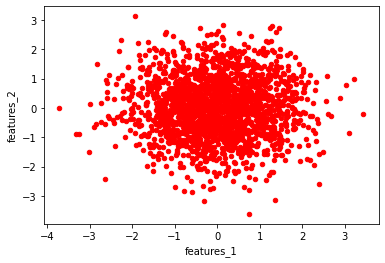

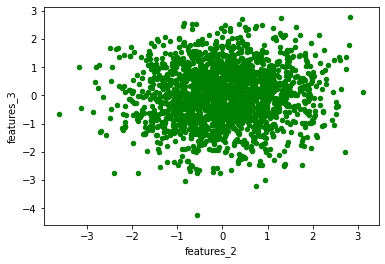

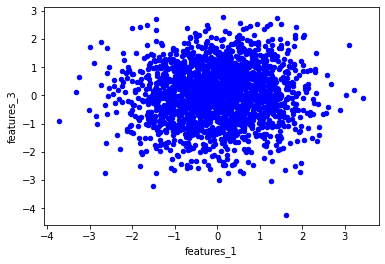

In [30]:
import matplotlib.pyplot as plt
!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P data
df2=pd.read_csv('data/regression_generated.csv')
p1 = df2.plot(kind='scatter', x='features_1', y='features_2', color='r')
p2 = df2.plot(kind='scatter', x='features_2', y='features_3', color='g')
p3 = df2.plot(kind='scatter', x='features_1', y='features_3', color='b')
print(p1,p2,p3)